In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/mbraaksma/Files/advgeocomp2024/advgeocomp2024/mvp01':
  os.chdir(r'/Users/mbraaksma/Files/advgeocomp2024/advgeocomp2024/mvp01')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/importlib/_bootstrap.py": 1687560340.4663458, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/importlib/_bootstrap_external.py": 1687560340.4713864, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/codecs.py": 1687560337.7702909, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/encodings/aliases.py": 1687560339.1612759, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/encodings/__init__.py": 1687560339.155254, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/encodings/utf_8.py": 1687560339.8500874, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/abc.py": 1687560337.6272814, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/io.py": 1687560337.9073498, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/stat.py": 1687560338.0990865, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/_collections_abc.py": 1687560337.5845973, "/Users/mbraaksma/mambaforge/e

/var/folders/ph/3yncn97j65s8dssq7h8rh48c0000gn/T/ipykernel_21563/1569345451.py:24: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
# Standard Library Imports
import os
import numpy as np
import pandas as pd

# Data Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial Data Imports
from osgeo import gdal, ogr
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import pygeoprocessing as pygeo
import osmnx as ox

# Set dir
# Define the path to your working directory
data_dir = '../../../base_data/advgeocomp2024/mvp01/data'
os.makedirs(data_dir, exist_ok=True)
# os.chdir(data_dir)

# Confirm the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/mbraaksma/Files/advgeocomp2024/advgeocomp2024/mvp01


In [3]:
# Get the geographic boundary for Lakeville, Minnesota
gdf_lakeville = ox.geocode_to_gdf("Lakeville, Minnesota, USA")

## Export 
gdf_lakeville_path = os.path.join(data_dir, 'lakeville.gpkg')
gdf_lakeville.to_file(gdf_lakeville_path, driver='GPKG')

In [4]:
# File paths
nlcd_path = '/Volumes/T7 Touch/Research/Reservation_Land/NLCD/raw/nlcd_2021_land_cover_l48_20230630/nlcd_2021_land_cover_l48_20230630.img' # large file on external drive
input_vector = gdf_lakeville_path
nlcd_lakeville_path = os.path.join(data_dir, 'nlcd_lakeville.tif')

if not os.path.exists(nlcd_lakeville_path):
    # Open the raster
    raster = gdal.Open(nlcd_path)

    # Use gdal.Warp to clip raster with the vector file
    gdal.Warp(
        nlcd_lakeville_path,
        raster,
        format='GTiff',
        cutlineDSName=input_vector,  # Path to vector file
        cropToCutline=True,          # Only crop the raster to the extent of the    vector
        dstNodata=-9999,             # Set nodata value for the output raster
    )

    # Close the dataset
    raster = None

In [5]:
# gdf = ox.features_from_place("Lakeville, Minnesota, USA", tags = {"landuse": True})
# gdf.explore(column='landuse')

In [6]:
# lulc_path = nlcd_lakeville_path
# lulc_data = gdal.Open(lulc_path)

# lulc_array = lulc_data.GetRasterBand(1).ReadAsArray()

# # Close the dataset
# lulc_data = None

# # Plot the raster data
# plt.figure(figsize=(10, 8))
# plt.imshow(lulc_array, cmap='viridis')  # Adjust colormap if needed
# plt.colorbar(label='Raster Values')
# plt.title('NLCD Plot')
# plt.show()

In [7]:
# Get OSM landuse data
gdf_landuse_full = ox.features_from_place("Lakeville, Minnesota, USA", tags = {"landuse": True})

# Keep only polygons (Polygon or MultiPolygon)
gdf_landuse = gdf_landuse_full[gdf_landuse_full['geometry'].geom_type.isin(['Polygon', 'MultiPolygon'])]

# Drop all columns except 'geometry' and 'landuse'
gdf_landuse = gdf_landuse[['geometry', 'landuse']]

# Reset index to remove the multi-index structure
gdf_landuse = gdf_landuse.reset_index(drop=True)

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning:

invalid value encountered in union

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects



In [8]:
# Define the mapping from landuse to landuse_esa
landuse_to_landuse_esa = {
    "grass": 71,                # Grassland/Herbaceous
    "residential": 22,          # Developed, Low Intensity
    "commercial": 24,           # Developed High Intensity
    "forest": 41,                # Deciduous Forest
    "farmland": 82,              # Cultivated Crops
    "industrial": 24,           # Developed High Intensity
    "farmyard": 82,              # Cultivated Crops
    "religious": 24,            # Developed High Intensity
    "recreation_ground": 71,    # Grassland/Herbaceous
    "basin": 12,                # Perennial Ice/Snow
    "cemetery": 21,             # Developed, Open Space
    "meadow": 71,               # Grassland/Herbaceous
    "retail": 24,               # Developed High Intensity
    "quarry": 31,               # Barren Land (Rock/Sand/Clay)
    "plant_nursery": 82,         # Cultivated Crops
    "brownfield": 24,           # Developed High Intensity
    "greenfield": 82,            # Cultivated Crops
    "construction": 24           # Developed High Intensity
}

# Create a new column 'landuse_esa' in the GeoDataFrame
gdf_landuse['landuse_esa'] = gdf_landuse['landuse'].map(landuse_to_landuse_esa)

In [9]:
# Load the nlcd raster to get its metadata
with rasterio.open(nlcd_lakeville_path) as src:
    meta = src.meta
    transform = src.transform

# Reproject the GeoDataFrame if necessary
if gdf_landuse.crs != src.crs:
    gdf_landuse = gdf_landuse.to_crs(src.crs)

# Create an empty array for the new raster
out_array = np.zeros((meta['height'], meta['width']), dtype=np.float32)

# Prepare geometries and attributes for rasterization
geometries = [(geom, int(row.landuse_esa)) for _, row in gdf_landuse.iterrows() for geom in [row.geometry]]

# Print geometry information for debugging
print("Number of geometries:", len(geometries))

# Rasterize the geometries
rasterized = rasterize(
    geometries,
    out_shape=out_array.shape,
    transform=transform,
    fill=0,  # Fill value for no data
    all_touched=True,  # Rasterize all pixels touched by geometries
    dtype='float32'
)

# Update the metadata for the new raster
# meta.update({'dtype': 'float32', 'count': 1})

# Write the rasterized output to a new file
osm_raster_path = os.path.join(data_dir, 'osm_raster.tif')
with rasterio.open(osm_raster_path, 'w', **meta) as dst:
    dst.write(rasterized, 1)

Number of geometries: 1546


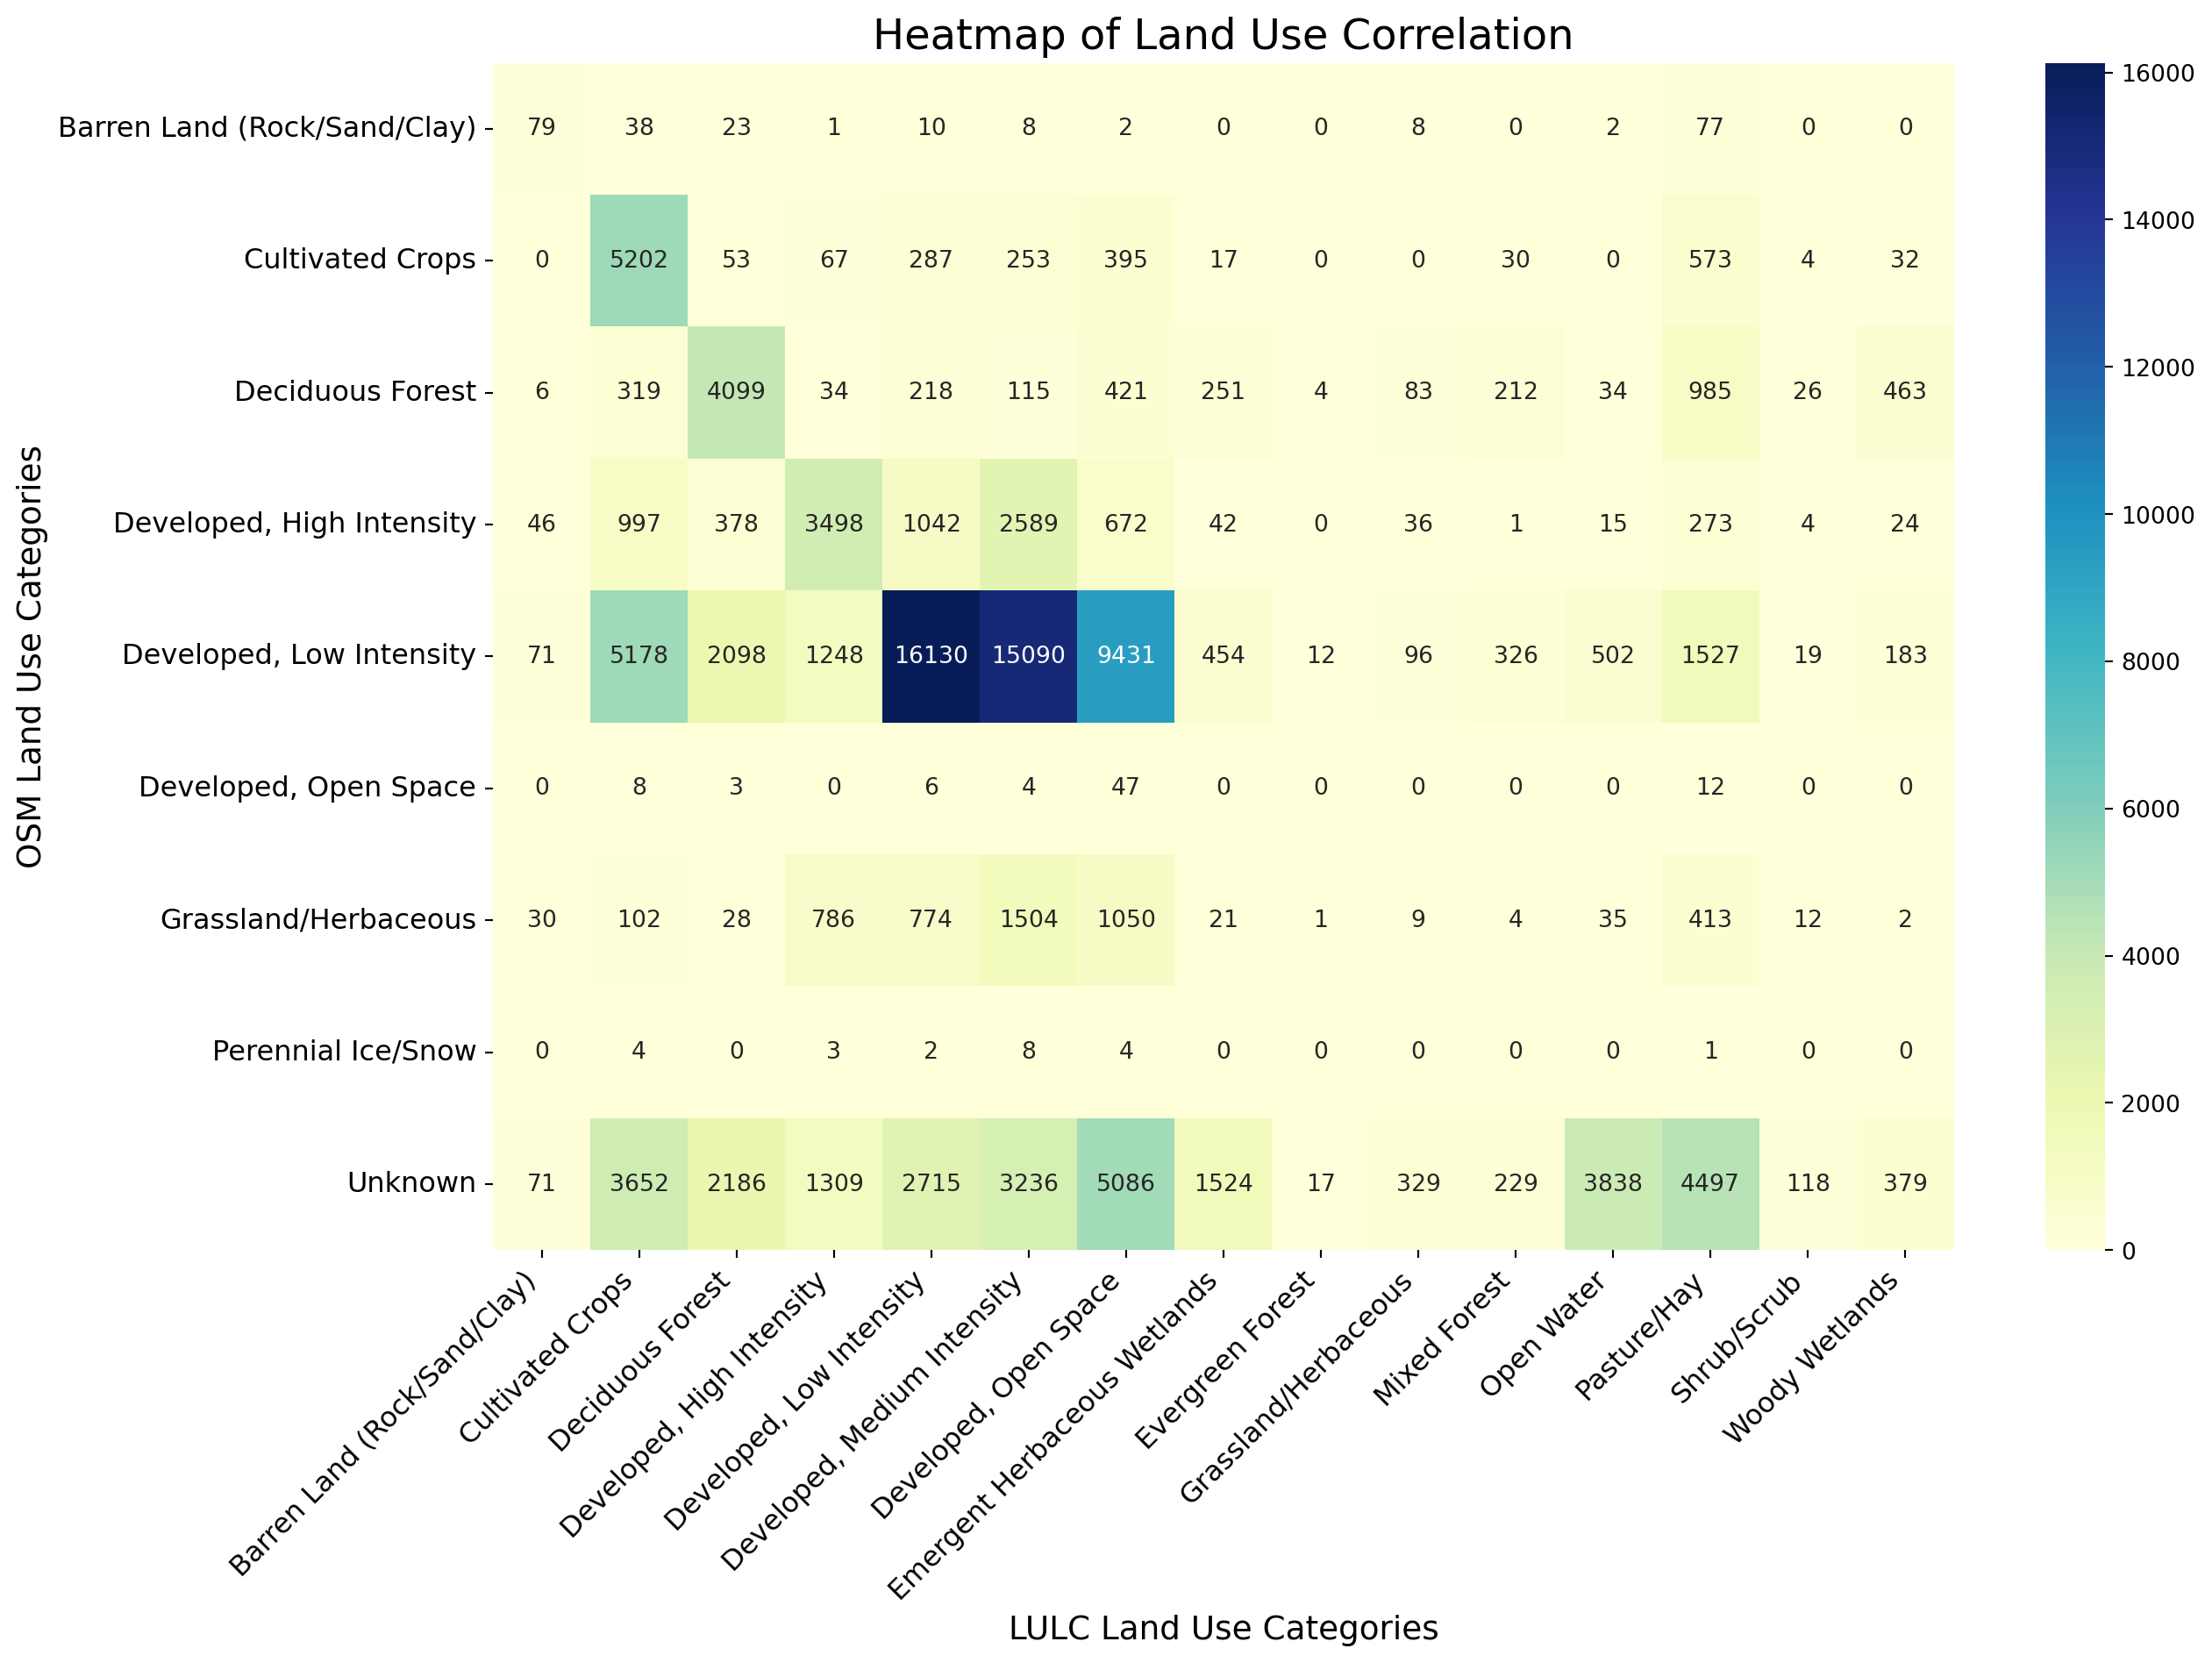

In [10]:
# Define file paths
osm_raster_path = '/Users/mbraaksma/Files/base_data/lulc/nlcd/osm_lakeville_rasterio.tif'
lulc_path = '/Users/mbraaksma/Files/base_data/lulc/nlcd/nlcd_clipped.tif'

# Function to read raster and convert to array
def read_raster_as_array(raster_path):
    dataset = gdal.Open(raster_path)
    array = dataset.ReadAsArray()
    return array

# Read the raster files
osm_raster = read_raster_as_array(osm_raster_path)
lulc_raster = read_raster_as_array(lulc_path)

# Define the mapping from landuse codes to labels
landuse_mapping = {
    11: "Open Water",
    12: "Perennial Ice/Snow",
    21: "Developed, Open Space",
    22: "Developed, Low Intensity",
    23: "Developed, Medium Intensity",
    24: "Developed, High Intensity",
    31: "Barren Land (Rock/Sand/Clay)",
    41: "Deciduous Forest",
    42: "Evergreen Forest",
    43: "Mixed Forest",
    51: "Dwarf Scrub",
    52: "Shrub/Scrub",
    71: "Grassland/Herbaceous",
    72: "Sedge/Herbaceous",
    73: "Lichens",
    74: "Moss",
    81: "Pasture/Hay",
    82: "Cultivated Crops",
    90: "Woody Wetlands",
    95: "Emergent Herbaceous Wetlands",
}

# Create a DataFrame from the raster arrays
osm_flat = osm_raster.flatten()
lulc_flat = lulc_raster.flatten()

# Convert the values to their corresponding labels using the mapping
osm_labels = [landuse_mapping.get(value, 'Unknown') for value in osm_flat]
lulc_labels = [landuse_mapping.get(value, 'Unknown') for value in lulc_flat]

# Create a DataFrame for cross tabulation
cross_tab_df = pd.DataFrame({'OSM Land Use': osm_labels, 'LULC Land Use': lulc_labels})

# Drop 'Unknown' from LULC land use
cross_tab_df = cross_tab_df[cross_tab_df['LULC Land Use'] != 'Unknown']

# Create the cross tabulation
cross_tab = pd.crosstab(cross_tab_df['OSM Land Use'], cross_tab_df['LULC Land Use'])

# Create a heatmap
plt.figure(figsize=(14, 10))  # Increase figure size for better spacing
sns.heatmap(cross_tab, annot=True, fmt='g', cmap='YlGnBu', cbar=True)

# Customize the plot
plt.title('Heatmap of Land Use Correlation', fontsize=18)  # Larger title font size
plt.xlabel('LULC Land Use Categories', fontsize=14)  # Larger x-axis label font size
plt.ylabel('OSM Land Use Categories', fontsize=14)  # Larger y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust alignment
plt.yticks(rotation=0, fontsize=12)  # Y-axis label font size

# Adjust layout to make room for labels
plt.subplots_adjust(bottom=0.2, left=0.15)  # Adjust these values as needed

# Show the plot
plt.tight_layout()
plt.show()